## Wordvectors lab
LLM's and ChatGPT | Fall 2023 | McSweeney | CUNY Graduate Center

**Due:** October 8

* **DOWNLOAD** [Embeddings file for Part 2 here](https://drive.google.com/file/d/1NQ_7ERV3eiUnPCoIW7I8yi4TZMiu2cEQ/view?usp=sharing)
* Unzip the file
* Move it to the folder where you are writing your code. 


### Background
The purpose of this lab is to explore the process of transforming words into numerical representations, and then understanding those values spatially. By the end of this lab (and corresponding lecture), you should be comfortable with the fact that computers transform text into numbers based on the context in which they appear. 

There are **two** parts to this lab:

* **Part 1**: We'll train our own vectors on a very small corpus to understand vector similarity in a contextualized setting. We'll explore what vectors look like, how words are related, and the vocabulary of a model. 
* **Part 2**: GloVe word embeddings. GloVe is an unsupervised learning algorithm to calculate the vectors of the words in a corpus. We will use the pre-trained version that comes from Wikipedia articles. You can find [more about the GloVe vectors here](https://nlp.stanford.edu/projects/glove/). The goal of this section is to understand general word embeddings as trained on a very large corpus. 




#### Notes
Our focus is on understanding the output of the algorithm functionally. It is not on the math or the code. We are using dimensionality reduction, which has a lot of uses including visualization and optimizing performance efficiency. For us, we are using dimensionality reduction for visualization. Word vectors create very large matrices. We can only visualize things on 2 or 3 dimension. So we reduce the dimensions. 

#### The book in the file
[From wikipedia:](https://en.wikipedia.org/wiki/Catching_Fire) Catching Fire is a 2009 dystopian young adult fiction novel by the American novelist Suzanne Collins, the second book in The Hunger Games series. As the sequel to the 2008 bestseller The Hunger Games, it continues the story of Katniss Everdeen and the post-apocalyptic nation of Panem. Following the events of the previous novel, a rebellion against the oppressive Capitol has begun, and Katniss and fellow tribute Peeta Mellark are forced to return to the arena in a special edition of the Hunger Games.

* `re` is the regular expression library
* `gensim` is for representing documents as vectors. It's the library built for making word vectors.

## Part 1: Gensim

In [1]:
import re
import nltk
import numpy as np
import matplotlib.pyplot as plt
import random

from gensim.models import Word2Vec

from sklearn.decomposition import IncrementalPCA   
from sklearn.manifold import TSNE   


Load a file and replace the markup characters

In [2]:
# read a file you have stored locally
# I added the Hunger Games for simplicity
file = open("hunger_games.txt", 'r').read()

# first, remove unwanted new line and tab characters from the text
for char in ["\n", "\r", "\d", "\t"]:
    file = file.replace(char, " ")

# check
print(file[:100])

The Second Book of THE HUNGER GAMES     New York Times Bestsel ling Author   SUZHNNE  COLLINS     PA


Clean the text a little bit (tokenize, lowercase)

In [3]:
# this is simplified for demonstration
def sample_clean_text(text: str):
    # step 1: tokenize the text into sentences
    sentences = nltk.sent_tokenize(text)

    # step 2: tokenize each sentence into words
    tokenized_sentences = [nltk.word_tokenize(sent) for sent in sentences]

    # step 3: convert each word to lowercase
    tokenized_text = [[word.lower() for word in sent] for sent in tokenized_sentences]
    
    # return your tokens
    return tokenized_text

# call the function
tokens = sample_clean_text(text = file)

# check
print(tokens[:10])

[['the', 'second', 'book', 'of', 'the', 'hunger', 'games', 'new', 'york', 'times', 'bestsel', 'ling', 'author', 'suzhnne', 'collins', 'parti', '``', 'the', 'spark', "''", '2', '|', 'p', 'a', 'g', 'e', 'catching', 'fire', '-', 'suzanne', 'collins', 'i', 'clasp', 'the', 'flask', 'between', 'my', 'hands', 'even', 'though', 'the', 'warmth', 'from', 'the', 'tea', 'has', 'long', 'since', 'leached', 'into', 'the', 'frozen', 'air', '.'], ['my', 'muscles', 'are', 'clenched', 'tight', 'against', 'the', 'cold', '.'], ['if', 'a', 'pack', 'of', 'wild', 'dogs', 'were', 'to', 'appear', 'at', 'this', 'moment', ',', 'the', 'odds', 'of', 'scaling', 'a', 'tree', 'before', 'they', 'attacked', 'are', 'not', 'in', 'my', 'favor', '.'], ['i', 'should', 'get', 'up', ',', 'move', 'around', ',', 'and', 'work', 'the', 'stiffness', 'from', 'my', 'limbs', '.'], ['but', 'instead', 'i', 'sit', ',', 'as', 'motionless', 'as', 'the', 'rock', 'beneath', 'me', ',', 'while', 'the', 'dawn', 'begins', 'to', 'lighten', 'the',

Establish the [word2vec ](https://www.tensorflow.org/text/tutorials/word2vec#:~:text=word2vec%20is%20not%20a%20singular,downstream%20natural%20language%20processing%20tasks.)model. We've given it our list of tokens. We said that for each token, we want to define it in the context of 100 words. 

This means that each vector will have 100 numbers in it representing the relationship between this word and 100 others. 

The larger this number is, the better the model. The smaller the number, the worse the model. 

In [4]:
model = Word2Vec(tokens,vector_size=100)

Now explore the entire vocabulary (note that only 1000 are represented because of the interface -- there are far more words in the vocab). Use this for ideas in the next section

In [5]:
model.wv.key_to_index

{'.': 0,
 ',': 1,
 'the': 2,
 'i': 3,
 'to': 4,
 'and': 5,
 'a': 6,
 'of': 7,
 '``': 8,
 "''": 9,
 "'s": 10,
 'it': 11,
 'in': 12,
 'my': 13,
 'he': 14,
 'that': 15,
 'but': 16,
 "n't": 17,
 'me': 18,
 '?': 19,
 'on': 20,
 'with': 21,
 'you': 22,
 'we': 23,
 'for': 24,
 'is': 25,
 'peeta': 26,
 'his': 27,
 'be': 28,
 'as': 29,
 'do': 30,
 'at': 31,
 'have': 32,
 'they': 33,
 'says': 34,
 'from': 35,
 'out': 36,
 'what': 37,
 'him': 38,
 'so': 39,
 'her': 40,
 'up': 41,
 'can': 42,
 'fire': 43,
 'was': 44,
 'she': 45,
 'not': 46,
 'this': 47,
 'no': 48,
 'if': 49,
 'there': 50,
 'catching': 51,
 'are': 52,
 'one': 53,
 'collins': 54,
 'g': 55,
 'all': 56,
 'p': 57,
 '-': 58,
 'suzanne': 59,
 'e': 60,
 '|': 61,
 "'m": 62,
 'know': 63,
 'say': 64,
 'about': 65,
 'into': 66,
 'when': 67,
 'us': 68,
 'haymitch': 69,
 'just': 70,
 'finnick': 71,
 'will': 72,
 'them': 73,
 'back': 74,
 'has': 75,
 'think': 76,
 'then': 77,
 'by': 78,
 'see': 79,
 'an': 80,
 "'re": 81,
 'even': 82,
 'like': 83

Now we pick a word from the corpus (remember this is lowercase) and see what the vector associated with it is. This is not human-readable, but it's this list (array) of numbers that helps us define the word in context.

In [6]:
model.wv.get_vector("capitol", norm=True)

array([ 0.00387504,  0.09926548,  0.02534481, -0.05413042,  0.02974081,
       -0.16141437, -0.00335838,  0.20503746, -0.10223789, -0.13196942,
        0.01183424, -0.0933821 , -0.00569293,  0.10991281,  0.03582763,
       -0.08229067,  0.00235945, -0.02192016, -0.07917953, -0.20925461,
        0.02064976, -0.00987378,  0.08435896, -0.09019215,  0.04603387,
       -0.0348905 , -0.08339201,  0.04597403, -0.1542789 ,  0.0320467 ,
        0.16352642,  0.02898788,  0.02092896, -0.08680508,  0.01697947,
        0.12250705,  0.04123301, -0.09363278, -0.05383148, -0.20438455,
        0.02497272, -0.12822095, -0.02074933,  0.01007003,  0.15310216,
       -0.04197883, -0.1361522 , -0.04028112,  0.09954152,  0.01678251,
        0.13729508, -0.12352751, -0.02671259,  0.01148572, -0.15671071,
        0.05329288, -0.04459713, -0.00494306, -0.15400945,  0.09450067,
        0.16349745,  0.05331121,  0.12832281,  0.01634125, -0.14611821,
        0.14489946,  0.0861051 ,  0.08763649, -0.18050316,  0.19

Find all the words most similar to a word you've chosen. Notice that this similarity is not the same as the vector representation above. 

After you run this cell, make a note of the top 5 words. Go back and change the number of words in the vector and re-run the cells in between. Did it change?

In [7]:
model.wv.most_similar('capitol')

[('arena', 0.996114194393158),
 ('one', 0.9954969882965088),
 ('year', 0.9922497272491455),
 ('last', 0.9901905655860901),
 ('night', 0.9895004630088806),
 ('first', 0.9883003234863281),
 ('coil', 0.9872675538063049),
 ('has', 0.9871431589126587),
 ('way', 0.9870836734771729),
 ('home', 0.9869207143783569)]

In [8]:
model2 = Word2Vec(tokens,vector_size=1000)
model2.wv.key_to_index
model2.wv.get_vector("capitol", norm=True)
model2.wv.most_similar('capitol')

[('arena', 0.9994192719459534),
 ('one', 0.9992039203643799),
 ('last', 0.9970139265060425),
 ('them', 0.9963167309761047),
 ('heel', 0.9962379336357117),
 ('year', 0.9961452484130859),
 ('13', 0.9960090517997742),
 ('who', 0.9956361651420593),
 ('night', 0.9953927993774414),
 ('end', 0.995286226272583)]

Now see how similar some words are. Change these words if you change the text. 

In [9]:
model.wv.similarity('katniss', 'girl')

0.77715063

In [10]:
model.wv.similarity('peeta', 'home')

0.9394094

Finally visualize the result. There's a lot of code here, it's really just for visualization. The first part is the dimensionality reduction (using t-SNE). The second part puts it on a visualization. 


Spend more time exploring the visualization than breaking down the code. 

The visualization that results is very hard to see. If you are in a Jupyter Notebook, there are tools in the upper right corner of the cell that has the visualization in it (they appear on hover). You can zoom in on the visualization to see the words and the relationships between the words. 

In [11]:
def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)  # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(model)

In [12]:
def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')


def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib
else:
    plot_function = plot_with_plotly

plot_function(x_vals, y_vals, labels)

## Part 2 : GloVe

**BEFORE you move on, did you:**

* DOWNLOAD the [Embeddings file for Part 2 here](https://drive.google.com/file/d/1NQ_7ERV3eiUnPCoIW7I8yi4TZMiu2cEQ/view?usp=sharing)
* Unzip the file
* Move it to the folder where you are writing your code. 

In [13]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

There are a few files in the `glove/6B` folder. These are the embeddings. You can open them and see them in any text editor. 50d is the smallest one. Each word has 50 dimensions. This means it is defined in terms of 50 other words. 

This lab uses the 100d file. If it's running slower than you like, feel free to use 50d instead. If you want more accurate word relationships, use one of the larger files. 

In [14]:
#establish an empty dictionary
embeddings_dict = {}

#open the file and read it into the dictionary
with open("glove.6B/glove.6B.100d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [15]:
#find the Euclidean distance between the vectors for words and 1 or more other words.
#sort the resulting word distances.
def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: 
                  spatial.distance.euclidean(embeddings_dict[word], embedding))

Now try it out - pick some words to experiment with. This experimentation section is the most important part of Part 2.

In [20]:
print(find_closest_embeddings(
    embeddings_dict["alien"]
)[:20])

['alien', 'aliens', 'creature', 'extraterrestrial', 'creatures', 'spaceship', 'demonic', 'sentient', 'undead', 'extraterrestrials', 'beings', 'malevolent', 'lifeforms', 'stranger', 'invaders', 'invisible', 'artifact', 'monster', 'monsters', 'supernatural']


In [21]:
print(find_closest_embeddings(
    embeddings_dict["encounter"]
)[:20])

['encounter', 'encounters', 'clash', 'duel', 'preceded', 'unfortunately', 'confrontation', 'encountered', 'goals_none', 'moments', 'thrilling', '_____________________________________________', '30-270', 'confronted', 'terrifying', 'http://www.nifc.gov/', 'describing', 'spirited', 'sight', 'indeed']


Now pick 2 words and see how it changes. Note that the `+` actually indicates that the vectors are being added. This may have slightly unexpected results.

In [22]:
print(find_closest_embeddings(
    embeddings_dict["alien"] + embeddings_dict["encounter"]
)[:20])

['alien', 'encounter', 'encounters', 'aliens', 'creatures', 'strange', 'creature', 'mysterious', 'extraterrestrial', 'evil', 'monsters', 'beings', 'escape', 'supernatural', 'reality', 'stranger', 'bizarre', 'magical', 'nature', 'monster']


See what happens with a 3rd. These embeddings are basically being triangulated - and this list is what is nearest to the center of these 3 points.

In [23]:
print(find_closest_embeddings(
    embeddings_dict["alien"] + embeddings_dict["encounter"] + embeddings_dict["ufo"]
)[:20])

['alien', 'ufo', 'aliens', 'encounter', 'encounters', 'extraterrestrial', 'creatures', 'paranormal', 'mysterious', 'strange', 'supernatural', 'creature', 'sightings', 'planet', 'ufos', 'predator', 'monsters', 'spaceship', 'mystery', 'phenomena']


Now transform the dictionary into an array so that we can do dimensionality reduction so we can visualize the words

In [24]:
words =  list(embeddings_dict.keys())
vectors = [embeddings_dict[word] for word in words]
X = np.asarray(vectors)

Now do the dimensionality reduction with t-SNE.

In [72]:
tsne = TSNE(n_components=3, random_state=0)  # changed n_components, 4 and 5 produced errors, but 3 works...
Y = tsne.fit_transform(X[:1000])

In [73]:
words

['the',
 ',',
 '.',
 'of',
 'to',
 'and',
 'in',
 'a',
 '"',
 "'s",
 'for',
 '-',
 'that',
 'on',
 'is',
 'was',
 'said',
 'with',
 'he',
 'as',
 'it',
 'by',
 'at',
 '(',
 ')',
 'from',
 'his',
 "''",
 '``',
 'an',
 'be',
 'has',
 'are',
 'have',
 'but',
 'were',
 'not',
 'this',
 'who',
 'they',
 'had',
 'i',
 'which',
 'will',
 'their',
 ':',
 'or',
 'its',
 'one',
 'after',
 'new',
 'been',
 'also',
 'we',
 'would',
 'two',
 'more',
 "'",
 'first',
 'about',
 'up',
 'when',
 'year',
 'there',
 'all',
 '--',
 'out',
 'she',
 'other',
 'people',
 "n't",
 'her',
 'percent',
 'than',
 'over',
 'into',
 'last',
 'some',
 'government',
 'time',
 '$',
 'you',
 'years',
 'if',
 'no',
 'world',
 'can',
 'three',
 'do',
 ';',
 'president',
 'only',
 'state',
 'million',
 'could',
 'us',
 'most',
 '_',
 'against',
 'u.s.',
 'so',
 'them',
 'what',
 'him',
 'united',
 'during',
 'before',
 'may',
 'since',
 'many',
 'while',
 'where',
 'states',
 'because',
 'now',
 'city',
 'made',
 'like',
 

In [74]:
X

array([[-0.038194, -0.24487 ,  0.72812 , ..., -0.1459  ,  0.8278  ,
         0.27062 ],
       [-0.10767 ,  0.11053 ,  0.59812 , ..., -0.83155 ,  0.45293 ,
         0.082577],
       [-0.33979 ,  0.20941 ,  0.46348 , ..., -0.23394 ,  0.47298 ,
        -0.028803],
       ...,
       [ 0.36088 , -0.16919 , -0.32704 , ...,  0.27139 , -0.29188 ,
         0.16109 ],
       [-0.10461 , -0.5047  , -0.49331 , ...,  0.42527 , -0.5125  ,
        -0.17054 ],
       [ 0.28365 , -0.6263  , -0.44351 , ...,  0.43678 , -0.82607 ,
        -0.15701 ]], dtype=float32)

In [75]:
Y

array([[ 15.902251 ,  -9.943788 ,   1.1530528],
       [  9.559277 ,  -5.8209815,  -1.2018266],
       [  5.234266 ,  -5.955338 ,  -0.7217789],
       ...,
       [ -1.0566576,  33.590626 ,  11.924689 ],
       [-17.970083 ,  20.557636 ,  14.413052 ],
       [-10.227269 ,  15.821027 ,  -1.2957296]], dtype=float32)

Plot the points

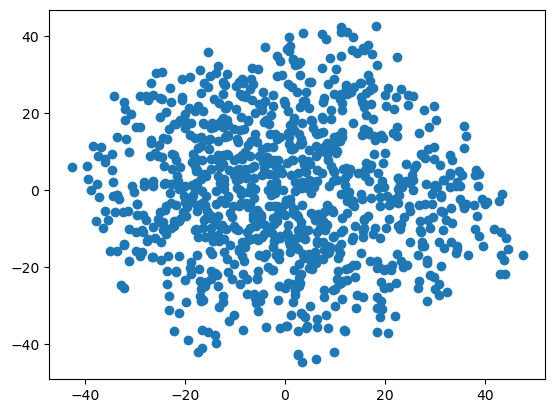

In [76]:
plt.scatter(Y[:, 0], Y[:, 1])

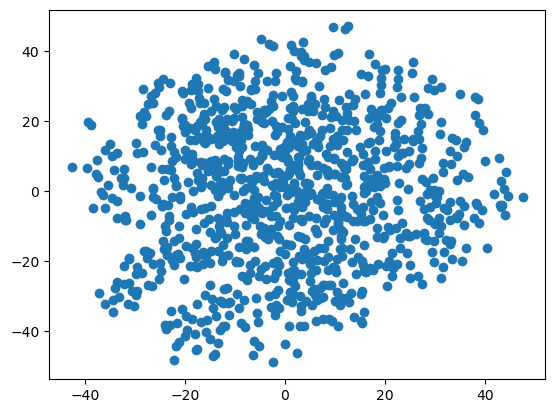

In [77]:
plt.scatter(Y[:, 0], Y[:, 2])

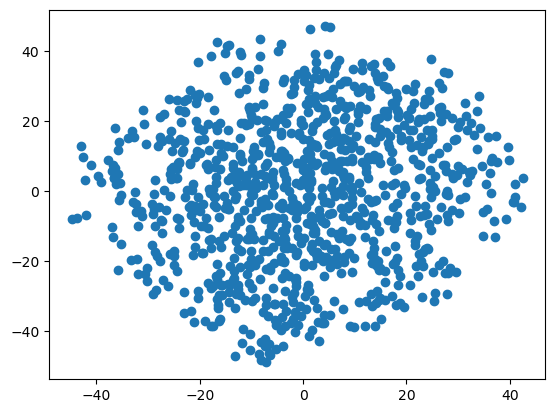

In [78]:
plt.scatter(Y[:, 1], Y[:, 2])

Annotate a few of the words. 

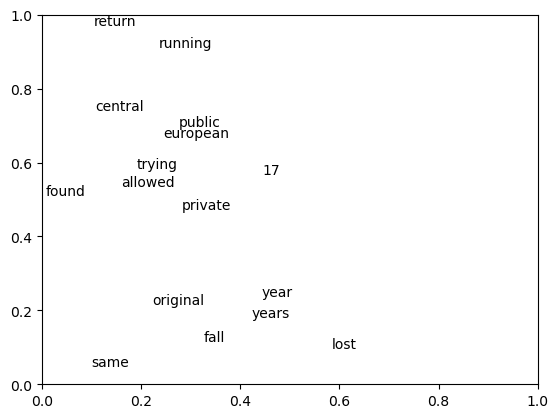

In [79]:
for label, x, y in zip(words, X[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()

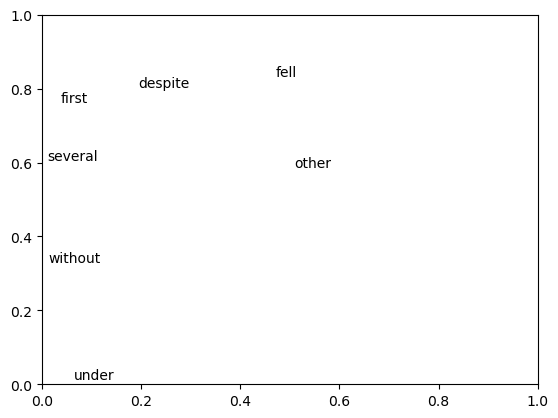

In [80]:
for label, x, y in zip(words, X[:, 1], Y[:, 0]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()

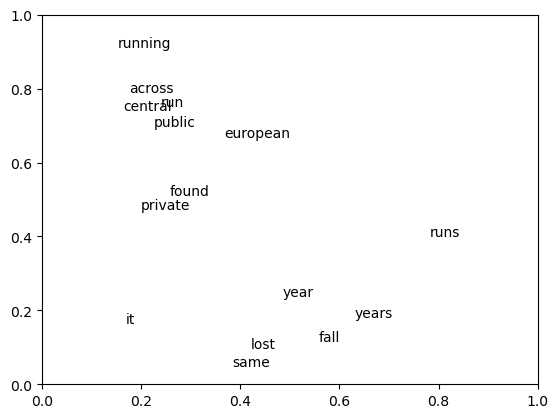

In [81]:
for label, x, y in zip(words, X[:, 1], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()

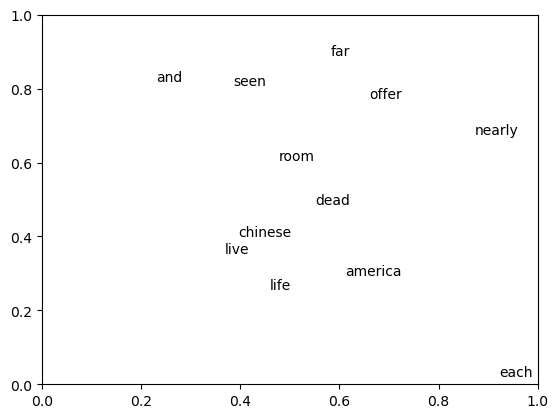

In [82]:
for label, x, y in zip(words, X[:, 1], Y[:, 2]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()

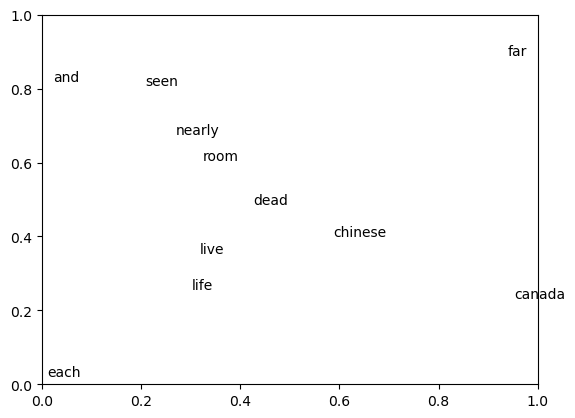

In [83]:
for label, x, y in zip(words, X[:, 2], Y[:, 2]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()

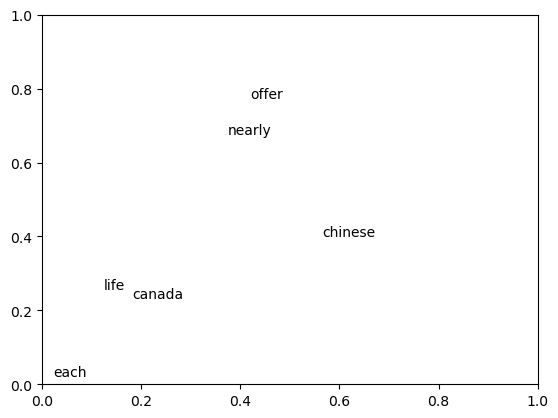

In [84]:
for label, x, y in zip(words, X[:, 3], Y[:, 2]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()

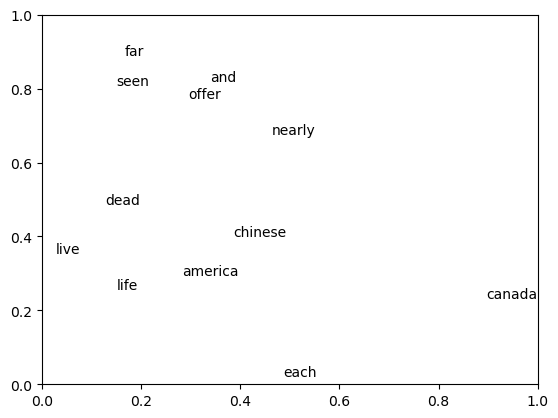

In [85]:
for label, x, y in zip(words, X[:, 4], Y[:, 2]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()

I think I understood most of what I was doing until the two plots at the end.  Not really sure what we are looking at or how we only annotated some of the words? So I played around with it a bit and I think I got a slightly better undersanding of the shape of the data and what is happneing in the plots but still not 100% sure...